In [5]:
from base import BasePlotter, np, plt
# import importlib
# import oneD
# importlib.reload(oneD)
from oneD import Solver1D, FluxMap1D
# Apply rcParams configuration
BasePlotter.configure_rc_params()

# Export figures to Folder
figures_path = "../Figures/FluxMap1D/"

# Generalising Step Concentrations

Concentration profile described by a midstep with varying starting positions ($x_0$) and lenghts ($l$), with the restriction $x_0 + l \leq L$.

$$
c_{\text{midstep}}(x; x_0,l) = 
\begin{cases} 
\frac{1}{l} & \text{if } x_0 \leq x \leq x_0 + l, \\
0 & \text{otherwise}.
\end{cases}
$$

In [6]:
def midstep_generator(x0, l):
    'Define the inner step function that takes x as parameter'
    def c_midstep(x):
        'Determine the condition based on x0 and l'
        cond = (x >= x0) & (x <= x0 + l)
        # Return 1/l where the condition is True, otherwise return 0
        return np.where(cond, 1 / l, 0)
    
    return c_midstep

### Comparable Consumption & Diffusion ($T_c \sim 1$)

ODEs solved: 100%|██████████| 124751/124751 [00:10<00:00, 12105.95it/s]


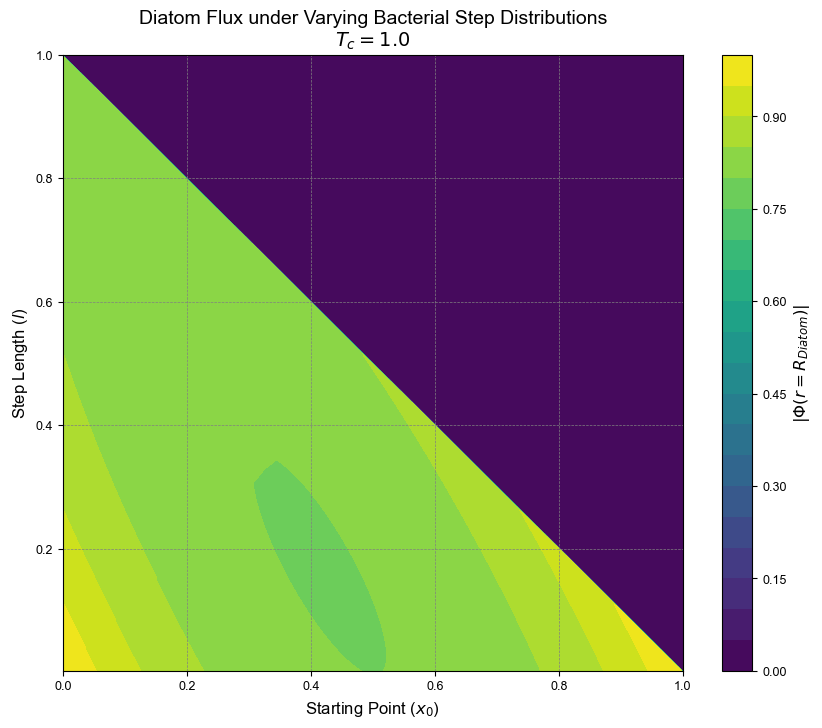

In [ ]:
syst_params = {
    'L' : 1.0, 'Tc': 1.0,
    'nx':  1000, # nx: Weird triangles appear if it's too low
    'n_x0' : 500,
    'n_l' : 500
}
FM_comp = FluxMap1D(syst_params, midstep_generator)
FM_comp.solve(n_jobs=-1)
FM_comp.plot()

### Diffusion Domination ($T_c \ll 1$)

In [8]:
syst_params['Tc'] = 0.1
FM_diff = FluxMap1D(syst_params, midstep_generator)
FM_diff.solve(n_jobs=-1)
FM_diff.plot()

NameError: name 'syst_params' is not defined

In [7]:
syst_params['Tc'] = 0.01
FM_diff2 = FluxMap1D(syst_params, midstep_generator)
FM_diff2.solve(n_jobs=-1)
FM_diff2.plot()

NameError: name 'syst_params' is not defined

### Consumption Domination ($T_c \gg 1$)

ODEs solved: 100%|██████████| 124751/124751 [00:06<00:00, 20461.46it/s]


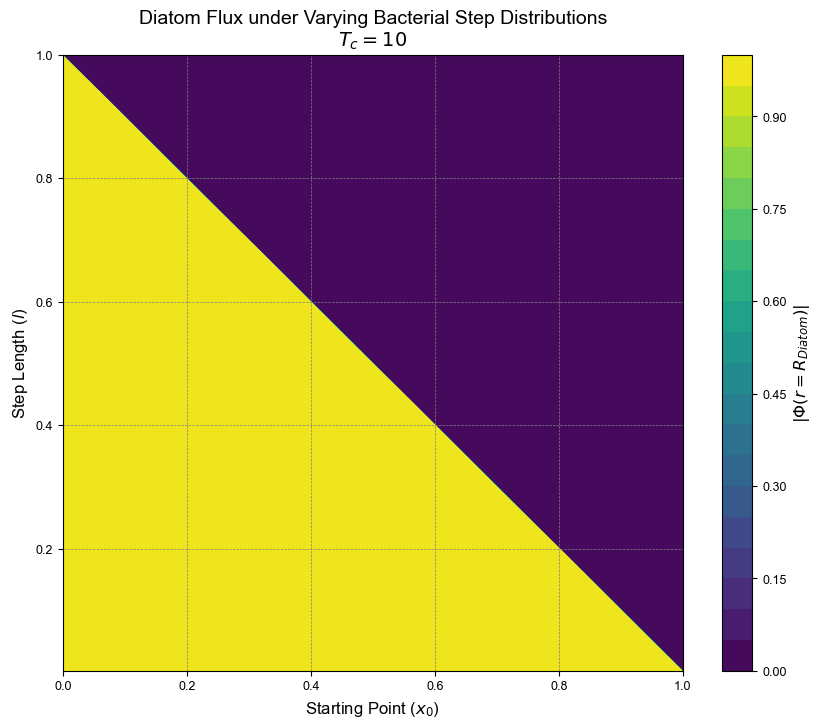

In [ ]:
syst_params['Tc'] = 10
FM_abs = FluxMap1D(syst_params, midstep_generator)
FM_abs.solve(n_jobs=-1)
FM_abs.plot()

Iterations completed: 100%|██████████| 31126/31126 [00:03<00:00, 7845.72it/s] 


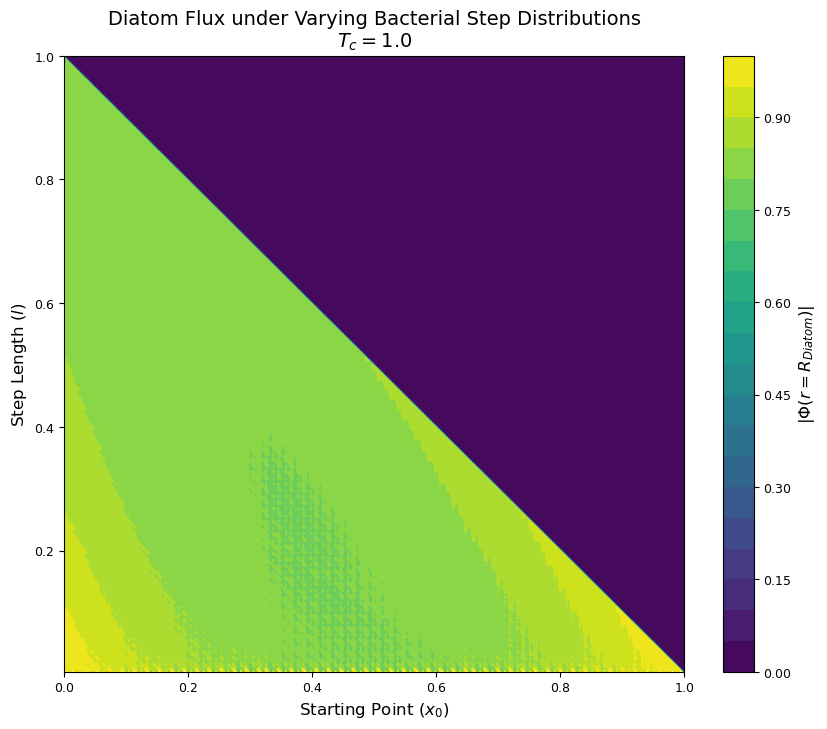

In [ ]:
syst_params = {
    'L' : 1.0, 'Tc': 1.0,
    'nx':  100,
    'n_x0': 250,'n_l': 250
}
DFM = FluxMap1D(syst_params, midstep_generator)
DFM.solve(n_jobs=-1)
DFM.plot()